# Dfsu - Export to shapefile

1. Read selected item and timestep from dfsu
2. Extract geometry
3. Create GeoPandas dataframe
4. Save to ESRI shapefile

In [1]:
import pandas as pd
import geopandas as gpd
import mikeio

## Step 1. read the selected data

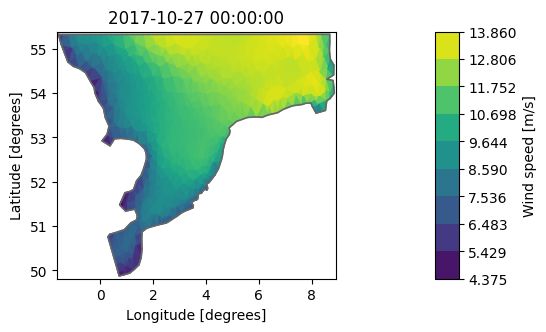

In [2]:
ds = mikeio.read("../tests/testdata/wind_north_sea.dfsu")
ws = ds["Wind speed"][0]
ws.plot();

## Step 2. extract geometry

In [3]:
shp = ds.geometry.to_shapely()
type(shp)

shapely.geometry.multipolygon.MultiPolygon

Geopandas does not like multipolygon, it should be a list of polygons

In [4]:
poly_list = [p for p in shp.geoms]

## Step 3. Create a geopandas dataframe

In [5]:
df = pd.DataFrame({'wind_speed':ws.to_numpy()})
df.head()

,wind_speed
0,9.530760
1,9.652719
2,9.806072
3,8.775489
4,11.013206


In [6]:
gdf = gpd.GeoDataFrame(df,geometry=poly_list, crs=4326)

## Step 4. Save to shapefile

In [7]:
gdf.to_file("wind_speed.shp")

## Step 5...
Do further work in QGIS

![QGIS](../images/dfsu_qgis.png)

Would you prefer to have this workflow to be a method on the `mikeio.Dfsu` class?

Post an issue on [GitHub](https://github.com/DHI/mikeio/issues) !

# Clean up

In [8]:
import os

files = ["wind_speed"]

exts = ["cpg","dbf","shp","shx"]

for file in files:
    for ext in exts:
        filename = f"{file}.{ext}"
        if os.path.exists(filename):
            os.remove(filename)